# Lab 4-13-22_Start

## Part I: Planets Dataset

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')


planets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
planets.shape

(1035, 6)

In [3]:
planets.groupby('method')

In [4]:
planets.groupby('method')['orbital_period']

In [5]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [6]:
#Iteration over groups
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [7]:
#Dispatch methods allows to call pandas methods on the groups
planets.groupby('method').describe().unstack()

               method                       
number  count  Astrometry                          2.0
               Eclipse Timing Variations           9.0
               Imaging                            38.0
               Microlensing                       23.0
               Orbital Brightness Modulation       3.0
                                                 ...  
year    max    Pulsar Timing                    2011.0
               Pulsation Timing Variations      2007.0
               Radial Velocity                  2014.0
               Transit                          2014.0
               Transit Timing Variations        2014.0
Length: 400, dtype: float64

In [8]:
#Challenge: Analyze planet discovery by method and by decade
#Count discovered planets by method and decade
#Calculate decade by dividing each year by 10 and adding a 0 at the end
decade = 10* (planets['year'] //10)
#Cast decade as a string and add an s at the end
decade = decade.astype(str)+'s'
#name the object to label the row in the results table
decade.name = 'decade'


In [9]:
print(type(decade))
print(decade)

<class 'pandas.core.series.Series'>
0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: decade, Length: 1035, dtype: object


In [11]:
#Create a new columnn in the dataframe with decade
planets['Decade'] = decade
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
 6   Decade          1035 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 56.7+ KB


In [14]:
#Use groupby to answer the question
planets.groupby(['method','Decade'])['number'].sum().unstack().fillna(0)

Decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [23]:
#Use pivottables instead of groupby and compare the code
planets.pivot_table('number', index='method', columns='Decade', aggfunc='sum')

Decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [15]:
#keep only the last decade and remove the other years from the dataset
#Define a list of years to keep
Years_Keep =[2010, 2011, 2012, 2013, 2014]

#Create a copy of the data with only the 2010s
rdf = planets[planets.year.isin(Years_Keep)].copy()
rdf

,method,number,orbital_period,mass,distance,year,Decade
2,Radial Velocity,1,763.000000,2.60,19.84,2011,2010s
9,Radial Velocity,2,452.800000,1.99,74.79,2010,2010s
10,Radial Velocity,2,883.000000,0.86,74.79,2010,2010s
20,Radial Velocity,5,0.736540,NaN,12.53,2011,2010s
26,Radial Velocity,1,691.900000,NaN,81.50,2012,2010s
...,...,...,...,...,...,...,...
1025,Transit,1,3.067850,NaN,60.00,2012,2010s
1026,Transit,1,0.925542,NaN,470.00,2014,2010s
1027,Imaging,1,NaN,NaN,19.20,2011,2010s
1028,Transit,1,3.352057,NaN,3200.00,2012,2010s


In [16]:
#Another way of keeping only the 2010s is to use the newly created
#Decade column and filter usingn that column
rdf1=planets[planets.Decade =='2010s'].copy()
rdf1

,method,number,orbital_period,mass,distance,year,Decade
2,Radial Velocity,1,763.000000,2.60,19.84,2011,2010s
9,Radial Velocity,2,452.800000,1.99,74.79,2010,2010s
10,Radial Velocity,2,883.000000,0.86,74.79,2010,2010s
20,Radial Velocity,5,0.736540,NaN,12.53,2011,2010s
26,Radial Velocity,1,691.900000,NaN,81.50,2012,2010s
...,...,...,...,...,...,...,...
1025,Transit,1,3.067850,NaN,60.00,2012,2010s
1026,Transit,1,0.925542,NaN,470.00,2014,2010s
1027,Imaging,1,NaN,NaN,19.20,2011,2010s
1028,Transit,1,3.352057,NaN,3200.00,2012,2010s


In [17]:
#Print dimensions of reduced dataset
print("The reduced dataset has {0} rows and {1} columns".format(rdf.shape[0], rdf.shape[1]))

The reduced dataset has 597 rows and 7 columns


In [21]:
# checking for missing values
print("Are there missing values? {}".format(rdf.isnull().any().any()))

Are there missing values? True


## Part II: Titanic Dataset

In [24]:
#Source: VanderPlas, 2017 (Chp. V3, p.170-172)
# https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/

import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# getting an overview of our data
print("The dataset has {0} rows and {1} columns".format(titanic.shape[0], titanic.shape[1]))
# checking for missing values
print("Are there missing values? {}".format(titanic.isnull().any().any()))
# general information about column data types and number of values
titanic.info()

The dataset has 891 rows and 15 columns
Are there missing values? True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [26]:
#Q1: What is the percentage of people who survived by gender and class?
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [27]:
#Q2: In absolute values, how many people survived per gender and class?
table= titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')
table

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


<AxesSubplot:xlabel='sex'>

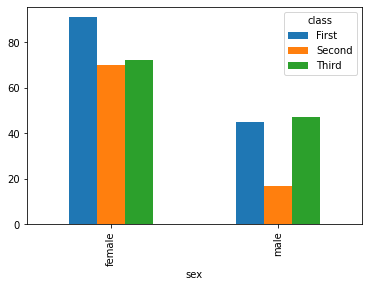

In [29]:
#Show table above graphically in a bar chart
table.plot(kind='bar')

In [30]:
#Q3: How many people boarded the titanic regardless of how many survived?
titanic.pivot_table('who',index='sex',columns='class', aggfunc='count', margins=True)

class,First,Second,Third,All
sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [31]:
#Q4: How many survived and how much they paid on average?
titanic.pivot_table(index='sex', columns = 'class', aggfunc = {'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47